In [1]:
import numpy as np
import pandas as pd
%matplotlib inline

In [2]:
# exemplo - sequencia de 0 até 19
dummy_series = pd.Series(range(20))
dummy_series

0      0
1      1
2      2
3      3
4      4
5      5
6      6
7      7
8      8
9      9
10    10
11    11
12    12
13    13
14    14
15    15
16    16
17    17
18    18
19    19
dtype: int64

In [3]:
from src.tde import UnivariateTDE

# série para matriz
UnivariateTDE(data=dummy_series, k=5, horizon=1)

,t-4,t-3,t-2,t-1,t-0,t+1
0,0.0,1.0,2.0,3.0,4.0,5
1,1.0,2.0,3.0,4.0,5.0,6
2,2.0,3.0,4.0,5.0,6.0,7
3,3.0,4.0,5.0,6.0,7.0,8
4,4.0,5.0,6.0,7.0,8.0,9
5,5.0,6.0,7.0,8.0,9.0,10
6,6.0,7.0,8.0,9.0,10.0,11
7,7.0,8.0,9.0,10.0,11.0,12
8,8.0,9.0,10.0,11.0,12.0,13
9,9.0,10.0,11.0,12.0,13.0,14


In [4]:
# vários pontos no futuro
UnivariateTDE(data=dummy_series, k=5, horizon=5)

,t-4,t-3,t-2,t-1,t-0,t+1,t+2,t+3,t+4,t+5
0,0.0,1.0,2.0,3.0,4.0,5,6.0,7.0,8.0,9.0
1,1.0,2.0,3.0,4.0,5.0,6,7.0,8.0,9.0,10.0
2,2.0,3.0,4.0,5.0,6.0,7,8.0,9.0,10.0,11.0
3,3.0,4.0,5.0,6.0,7.0,8,9.0,10.0,11.0,12.0
4,4.0,5.0,6.0,7.0,8.0,9,10.0,11.0,12.0,13.0
5,5.0,6.0,7.0,8.0,9.0,10,11.0,12.0,13.0,14.0
6,6.0,7.0,8.0,9.0,10.0,11,12.0,13.0,14.0,15.0
7,7.0,8.0,9.0,10.0,11.0,12,13.0,14.0,15.0,16.0
8,8.0,9.0,10.0,11.0,12.0,13,14.0,15.0,16.0,17.0
9,9.0,10.0,11.0,12.0,13.0,14,15.0,16.0,17.0,18.0


<AxesSubplot:>

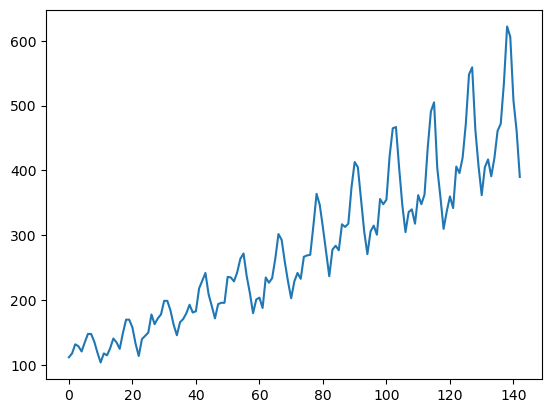

In [5]:
from pmdarima.datasets import load_airpassengers

series = load_airpassengers(as_series=True)[:-1]

series.plot()

In [6]:
series_df = UnivariateTDE(data=series, k=5, horizon=1)
series_df.head()

,t-4,t-3,t-2,t-1,t-0,t+1
0,112.0,118.0,132.0,129.0,121.0,135.0
1,118.0,132.0,129.0,121.0,135.0,148.0
2,132.0,129.0,121.0,135.0,148.0,148.0
3,129.0,121.0,135.0,148.0,148.0,136.0
4,121.0,135.0,148.0,148.0,136.0,119.0


In [7]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# separando as variáveis explicativas
X = series_df.drop('t+1', axis=1)
y = series_df['t+1']

# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=False)

In [8]:
# treinando uma Random Forest
model = RandomForestRegressor()
model.fit(X_train, y_train)

RandomForestRegressor()

In [9]:
# previsoes
forecasts = model.predict(X_test)
forecasts[:10]

array([330.35, 368.22, 355.86, 354.28, 348.23, 307.44, 287.23, 320.54,
       330.  , 330.33])

In [10]:
# computing the error
from src.error import MASE

MASE(y_train, y_test, forecasts)

4.210317460317461

<AxesSubplot:title={'center':'Forecasting with RF'}>

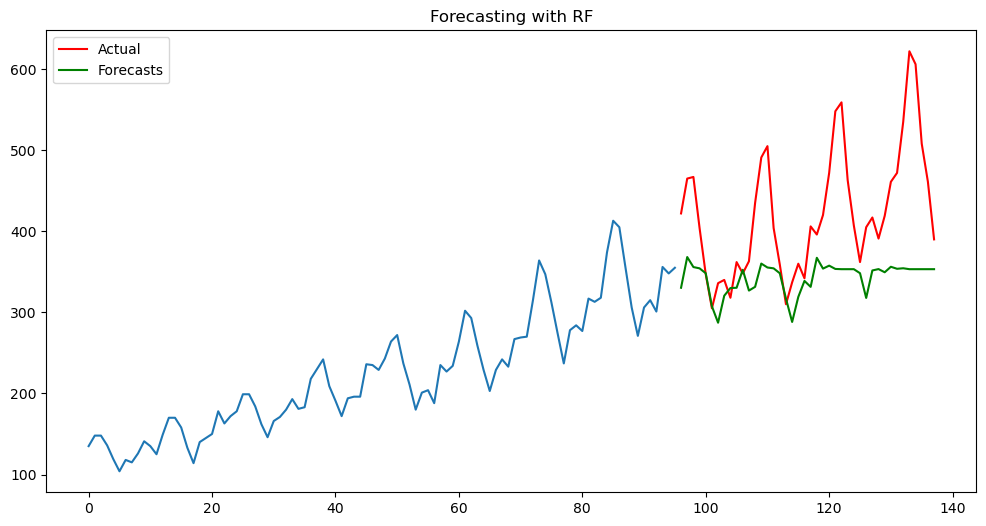

In [11]:
y_test = y_test.rename('Actual')
forecasts = pd.Series(forecasts, index=y_test.index).rename('Forecasts')
ax = y_train.plot()
ax = y_test.plot(legend=True,color='red', figsize=(12,6),title='Forecasting with RF')
forecasts.plot(legend=True, color='green')

In [12]:
from sklearn.linear_model import Ridge, Lasso, LinearRegression
from sklearn.tree import DecisionTreeRegressor
from lightgbm import LGBMRegressor

ridge = Ridge()
lasso = Lasso()
linear_reg = LinearRegression()
rf = RandomForestRegressor()
tree = DecisionTreeRegressor()
lgbm = LGBMRegressor()

ModuleNotFoundError: No module named 'lightgbm'

In [ ]:
ridge.fit(X_train, y_train)
lasso.fit(X_train, y_train)
linear_reg.fit(X_train, y_train)
rf.fit(X_train, y_train)
tree.fit(X_train, y_train)
lgbm.fit(X_train, y_train)

In [ ]:
models = [ridge, lasso, linear_reg, rf, tree, lgbm]
colors = ['yellow','orange','green','grey','black','purple']
forecasts = []
for j,m in enumerate(models):
    print(j)
    pred = m.predict(X_test)
    pred = pd.Series(pred, index=y_test.index).rename(f'Forecast {j}')
    forecasts.append(pred)


In [ ]:
ax = y_train.plot()
ax = y_test.plot(legend=True,color='red', figsize=(12,6))
for j, pred in enumerate(forecasts):
    pred.plot(legend=True, color=colors[j])

In [ ]:
for pred in forecasts:
    print(MASE(y_train, y_test, pred))

In [ ]:
ridge.fit(X_train[1:], y_train.diff()[1:])
lasso.fit(X_train[1:], y_train.diff()[1:])
linear_reg.fit(X_train[1:], y_train.diff()[1:])
rf.fit(X_train[1:], y_train.diff()[1:])
tree.fit(X_train[1:], y_train.diff()[1:])
lgbm.fit(X_train[1:], y_train.diff()[1:])

In [ ]:
models = [ridge, lasso, linear_reg, rf, tree, lgbm]
for m in models:
    pred = m.predict(X_test)
    print(MASE(y_train.diff()[1:], y_test.diff()[1:], pred[1:]))

# Transformations

##### About the importance of transformations

In [ ]:
dummy_series.plot()

In [ ]:
train, test = train_test_split(dummy_series, test_size=1, shuffle=False)

train.tail()

In [ ]:
test.head()

In [ ]:
train_df = UnivariateTDE(data=train, k=3, horizon=1)

train_df

In [ ]:
X_train, y_train = train_df.drop('t+1', axis=1), train_df['t+1']

In [ ]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(X_train.values, y_train)

forecast = model.predict([[16,17,18]])

forecast

In [ ]:
# same process but with differenced data
train_df = UnivariateTDE(data=train.diff(), k=3, horizon=1)
print(train_df)

X_train, y_train = train_df.drop('t+1', axis=1), train_df['t+1']

from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(X_train.values, y_train)

In [ ]:
forecast = model.predict([[16,17,18]])
print(forecast)

# adding last known value to the forecast to revert the differencing operation
forecast + train.values[-1]